In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Veri yükleme (dosya yolunu çalışma dizininize göre güncelleyin)
df = pd.read_csv("creditcard.csv")

In [18]:
# 2) V1–V10 öznitelikleri seçip korelasyon matrisini hesapla
features = [f"V{i}" for i in range(1, 28)]
corr = df[features].corr()
class_counts = df['Class'].value_counts().rename_axis('Class').reset_index(name='count')



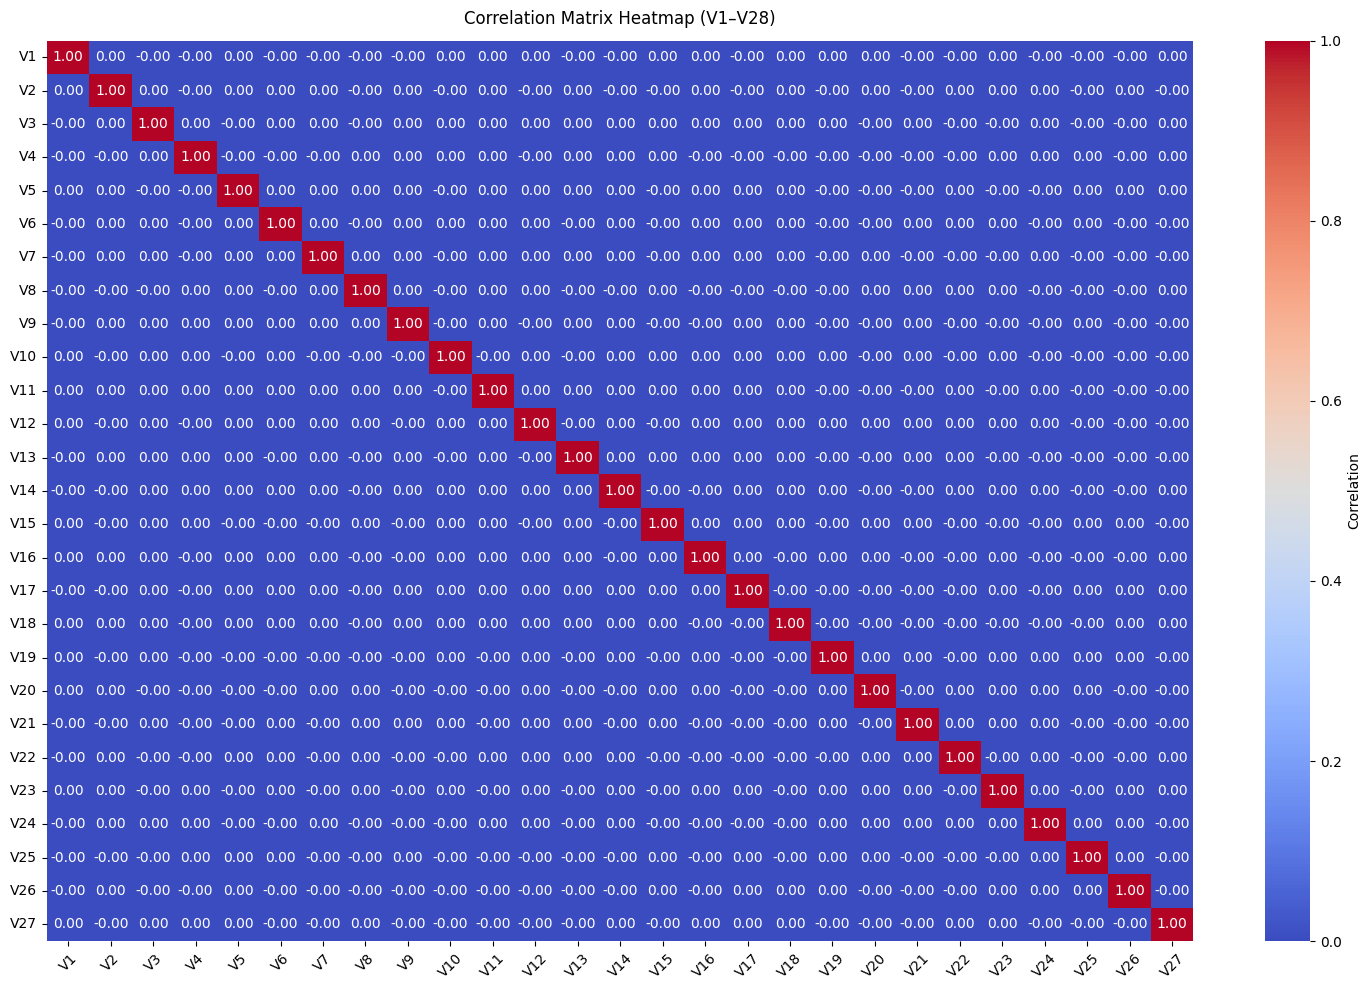

In [36]:
# 3) Korelasyon matrisini seaborn ile ısı haritası olarak görselleştir, hücrelere değerleri yazdır
plt.figure(figsize=(15, 10))
sns.heatmap(
    corr,
    annot=True,      # Hücrelere sayısal değerleri yaz
    fmt=".2f",       # Ondalık format (2 basamak)
    cmap="coolwarm", # Renk paleti
    cbar_kws={"label": "Correlation"}
)
plt.title("Correlation Matrix Heatmap (V1–V28)", pad=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

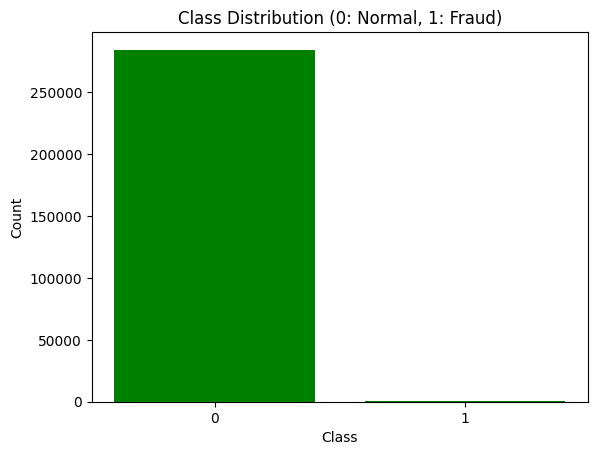

In [31]:
# 2) Sınıf dağılımı bar grafiği
plt.figure()
plt.bar(class_counts['Class'].astype(str), class_counts['count'], color="green")
plt.title("Class Distribution (0: Normal, 1: Fraud)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

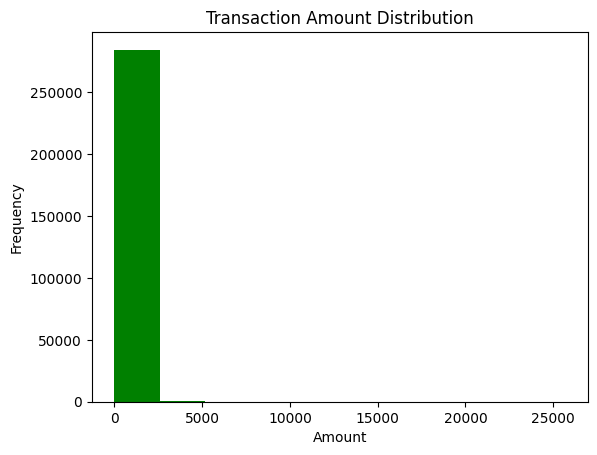

In [32]:
# 3) Transaction Amount histogramı
plt.figure()
plt.hist(df['Amount'], bins=10, color="green")
plt.title("Transaction Amount Distribution")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

/var/folders/q_/kv70rwvs231dgrbcrfdpmlt40000gn/T/ipykernel_73249/2116656641.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[f"V{i}"] for i in range(1, 28)], labels=[f"V{i}" for i in range(1, 28)])


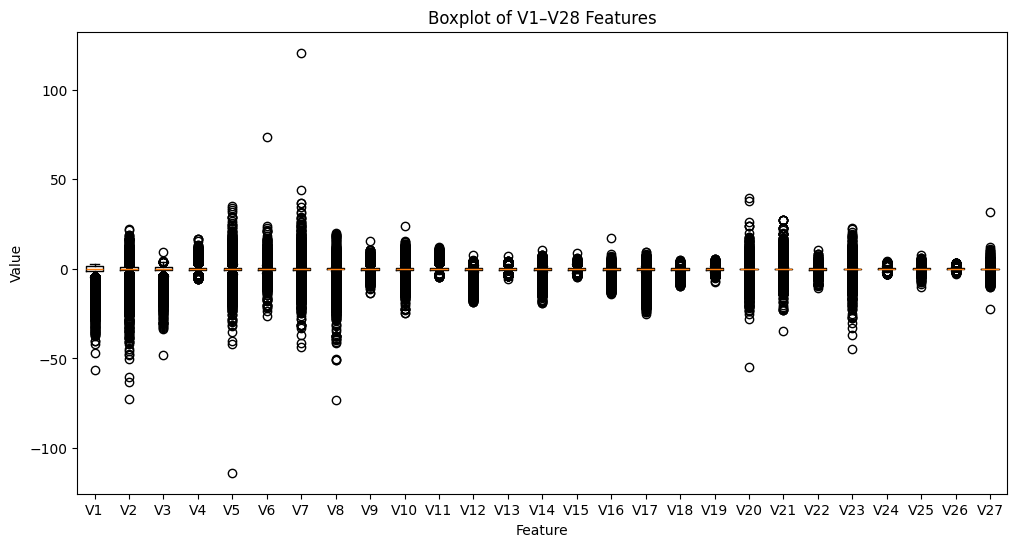

In [35]:
# 4) V1–V5 boxplot
plt.figure(figsize=(12, 6)) 
plt.boxplot([df[f"V{i}"] for i in range(1, 28)], labels=[f"V{i}" for i in range(1, 28)])
plt.title("Boxplot of V1–V28 Features")
plt.xlabel("Feature")
plt.ylabel("Value")
plt.show()

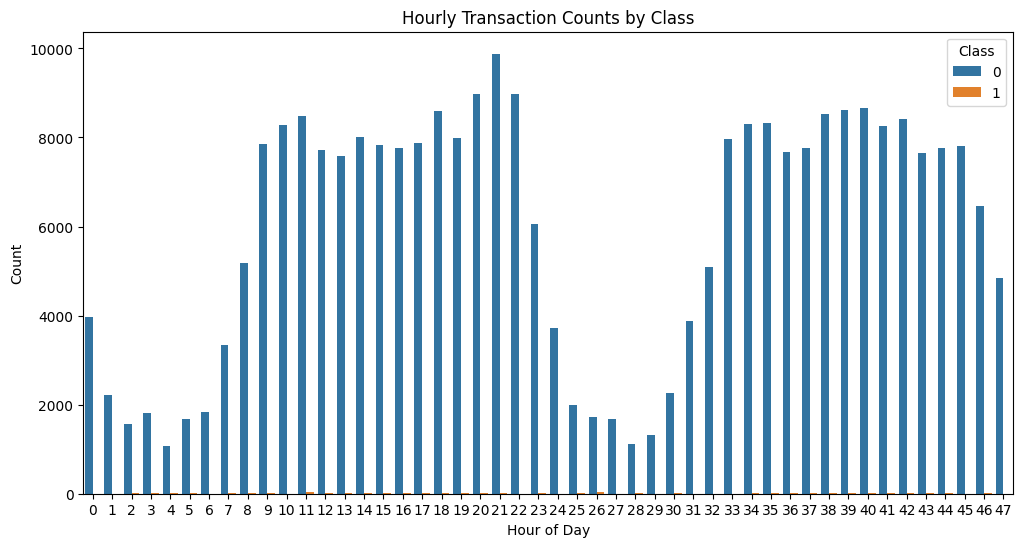

In [39]:
# 3) Saatlik işlem sayısı (Class bazlı)
df["Hour"] = (df["Time"] // 3600).astype(int)
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="Hour", hue="Class")
plt.title("Hourly Transaction Counts by Class")
plt.xlabel("Hour of Day")
plt.ylabel("Count")
plt.legend(title="Class")
plt.show()

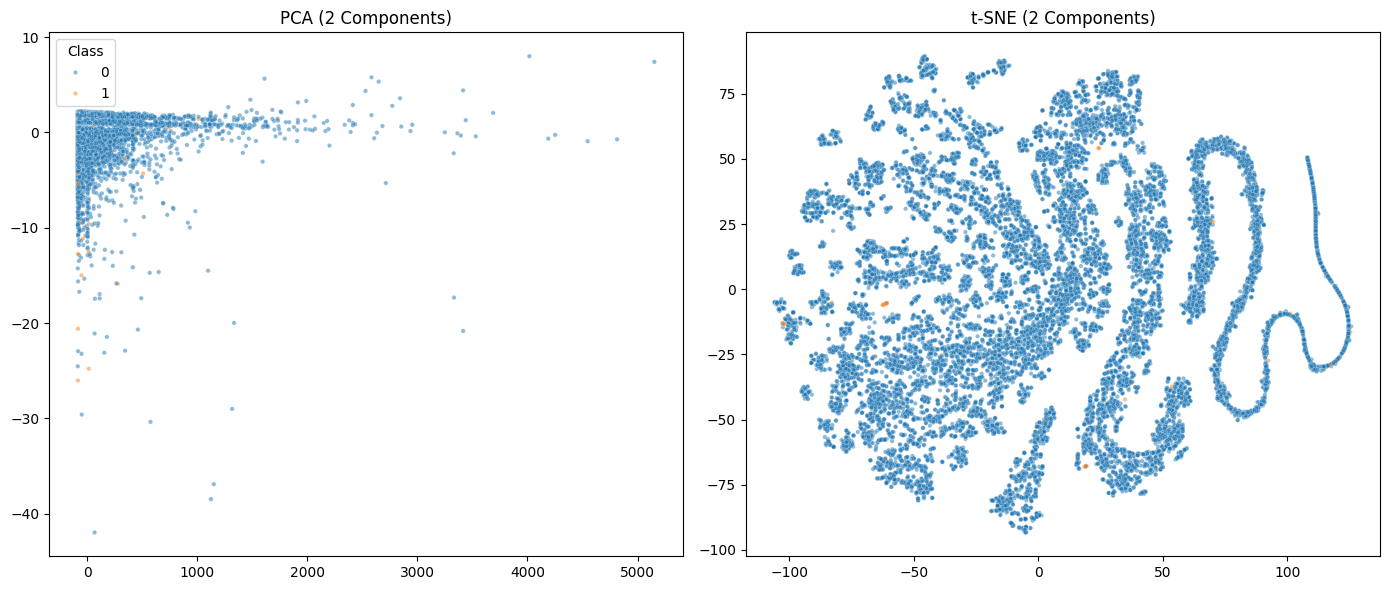

In [40]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# 4) PCA ile 2B projeksiyon + t-SNE (örnekleme yaparak)
features = [f"V{i}" for i in range(1, 29)] + ["Amount"]
sample = df.sample(20000, random_state=42)
pca2 = PCA(n_components=2).fit_transform(sample[features])
tsne2 = TSNE(n_components=2, random_state=42, init="pca").fit_transform(sample[features])

fig, axes = plt.subplots(1, 2, figsize=(14,6))
sns.scatterplot(x=pca2[:,0], y=pca2[:,1], hue=sample["Class"], palette="tab10",
                legend="brief", alpha=0.5, ax=axes[0], s=10)
axes[0].set_title("PCA (2 Components)")

sns.scatterplot(x=tsne2[:,0], y=tsne2[:,1], hue=sample["Class"], palette="tab10",
                legend=False, alpha=0.5, ax=axes[1], s=10)
axes[1].set_title("t-SNE (2 Components)")

for ax in axes:
    ax.set_xlabel("")
    ax.set_ylabel("")
plt.tight_layout()
plt.show()